In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv('titanic3.csv')


In [3]:
data.replace('?', np.nan, inplace= True)
data = data.astype({"age": np.float64, "fare": np.float64})


<Axes: xlabel='survived', ylabel='fare'>

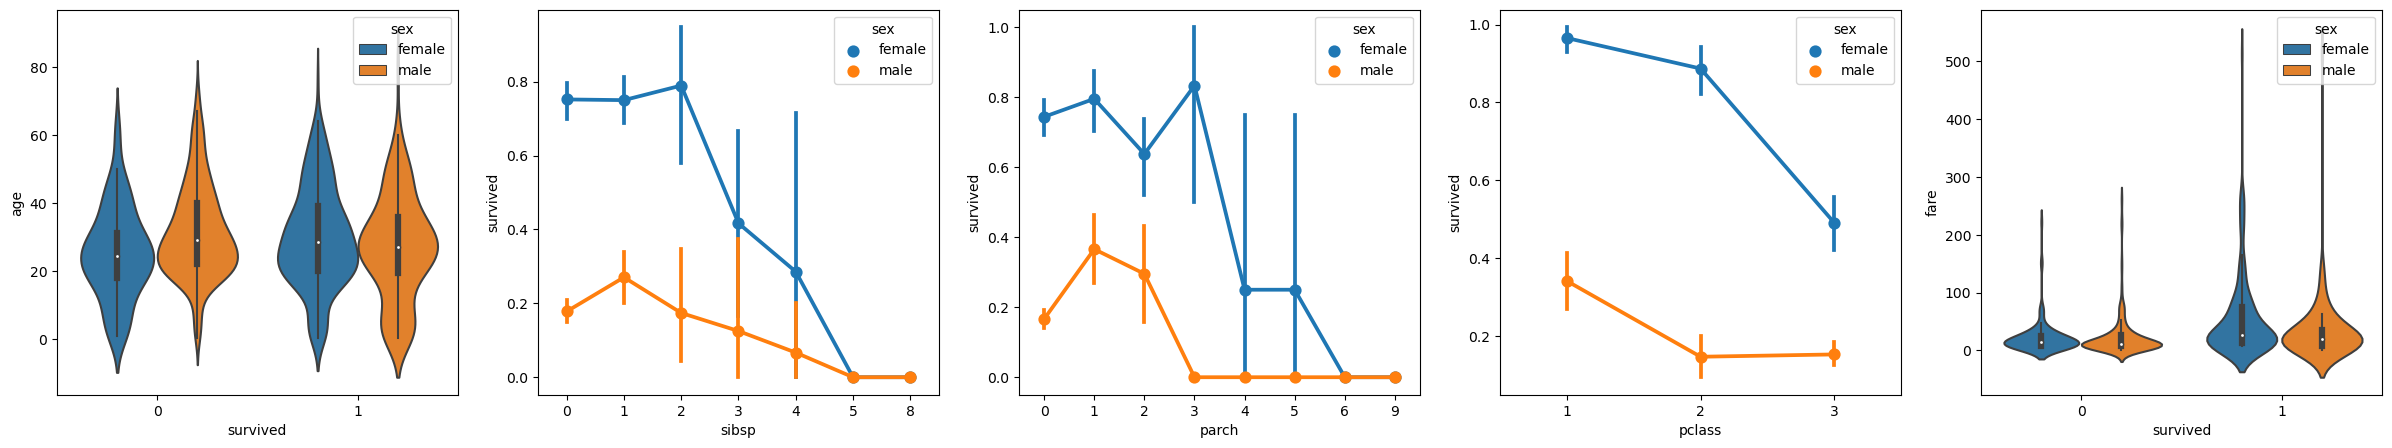

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

In [5]:
data.replace({'male': 1, 'female': 0}, inplace=True)


In [6]:
data.corr().abs()[["survived"]]


C:\Users\pawar\AppData\Local\Temp\ipykernel_17244\1402684040.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().abs()[["survived"]]


,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN


Create a new variable and column called relatives

In [7]:
data['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
data.corr().abs()[["survived"]]


C:\Users\pawar\AppData\Local\Temp\ipykernel_17244\4035446611.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().abs()[["survived"]]


,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN
relatives,0.201719


eliminating NaN values

In [8]:
data = data[['sex', 'pclass','age','relatives','fare','survived']].dropna()


splitting a dataset into training and test data with scikit learn library

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['sex','pclass','age','relatives','fare']], data.survived, test_size=0.2, random_state=0)

normalization of the inputs such that values for age range from ~0-100, while gender is only a 1 or 0. By normalizing all the variables, you can ensure that the ranges of values are all the same.

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

Adding a ML algo. for eg. Naive bayes here

In [11]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)


GaussianNB()

add test extra data to train it

In [12]:
from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

0.7464114832535885


if your accuracy is close to 1 then it is the actual accuracy. The more your accuracy close to 1 more accurate the model is.

now lets try to add neural network here. this can be done with keras librarty with tensorflow.

In [13]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()


 downlaod keras from creating an environment in anconda shell server and while creating import packages. run:
 conda create -n myenv python=3.10 pandas jupyter seaborn scikit-learn keras tensorflow

In [15]:
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5))
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

we added 3 layers in the neural network.

First layer has a dimension of 5 since you have five inputs: sex, pclass, age, relatives, and fare.
The last layer must output 1, since you want a 1-dimensional output indicating whether a passenger would survive.
The middle layer was kept at 5 for simplicity, although that value could have been different.

Now lets look at the summary of the model by

In [16]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
 dense_3 (Dense)             (None, 5)                 10        
                                                                 
 dense_4 (Dense)             (None, 5)                 30        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 112
Trainable params: 112
Non-trainable pa

Now obuilding and traing the model

you need to define what type of optimizer will be used, how loss will be calculated, and what metric should be optimized for. Add the following code to build and train the model. 

In [17]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=50)


Epoch 1/50
27/27 [==============================] - 5s 3ms/step - loss: 0.6925 - accuracy: 0.5670
Epoch 2/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6909 - accuracy: 0.5861
Epoch 3/50
27/27 [==============================] - 0s 4ms/step - loss: 0.6894 - accuracy: 0.5861
Epoch 4/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6876 - accuracy: 0.5861
Epoch 5/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6861 - accuracy: 0.5861
Epoch 6/50
27/27 [==============================] - 0s 3ms/step - loss: 0.6848 - accuracy: 0.5861
Epoch 7/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6833 - accuracy: 0.5861
Epoch 8/50
27/27 [==============================] - 0s 3ms/step - loss: 0.6819 - accuracy: 0.5861
Epoch 9/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6806 - accuracy: 0.5861
Epoch 10/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6792 - accuracy: 0.5861
Epoch 11/50
27/27 [

now lets see how it works against the data

In [18]:
y_pred = np.rint(model.predict(X_test).flatten())
print(metrics.accuracy_score(y_test, y_pred))



7/7 [==============================] - 4s 3ms/step
0.7894736842105263


As you can see the accuracy is 79 percentage